# Self-RAG: Enhancing Contextual Relevance Through Self-Reflection


Self-RAG (Self-Reflective Retrieval-Augmented Generation) is an innovative framework that utilizes the model's own outputs as retrieval candidates to improve contextual relevance. By refining responses iteratively, Self-RAG enhances consistency and coherence while grounding responses in prior outputs for increased accuracy. This adaptive approach allows the model to adjust its retrieval strategies based on the evolving context of the conversation.



## Key Features of Self-RAG



- **Model Outputs as Retrieval Candidates**: Utilizes the model's own generated outputs as potential retrieval candidates, allowing for better contextual relevance in responses.

- **Iterative Refinement**: Refines responses through multiple iterations, improving the overall quality and coherence of the output.

- **Grounding in Prior Outputs**: Bases new responses on previous outputs, enhancing accuracy and reducing inconsistencies.

- **Dynamic Retrieval Strategies**: Adapts retrieval methods according to the ongoing context of the conversation, ensuring responses remain relevant and accurate.



## How Self-RAG Works



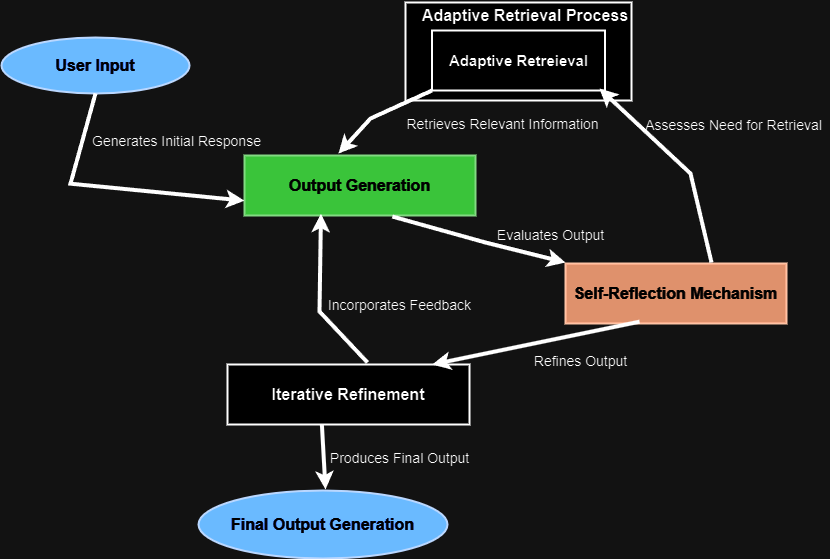

1. **Output Generation**: The model generates an initial response based on user input and its internal knowledge base.

2. **Self-Reflection Mechanism**: After generating a response, the model uses reflection tokens to evaluate its output critically. This involves assessing coherence, relevance, and factual accuracy.

3. **Adaptive Retrieval**: If the self-reflection indicates that additional information is needed or that improvements can be made, the model retrieves relevant passages from its prior outputs or external sources.

4. **Iterative Refinement**: The model refines its response iteratively by incorporating insights gained during self-reflection and adapting its output based on retrieved information.

5. **Final Output Generation**: After several iterations of refinement and adjustment, the final output is produced, ensuring it is coherent, accurate, and contextually relevant.



In [ ]:
!pip install pypdf2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 9.1 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 0: Set up the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and Read the PDF
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Preprocess Text into Chunks
chunk_size = 1000
chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
print(f"Number of chunks created: {len(chunks)}")

Number of chunks created: 65


In [ ]:
# Step 3: Output Generation - Initial Response Based on User Input
user_query = "what is GLUE?"

In [ ]:
def generate_initial_response(query):
    try:
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": f"Generate an initial response to the following query:\n\n{query}"},
            ],
            model="llama3-8b-8192",
        )
        return response.choices[0].message.content
    except Exception as e:
        print(f"Error during initial response generation: {e}")
        return None

In [ ]:
initial_response = generate_initial_response(user_query)

In [ ]:
# Step 4: Self-Reflection Mechanism - Evaluate the Output
def self_reflect(response):
    try:
        reflection_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a self-reflective assistant."},
                {"role": "user", "content": f"Evaluate the following response for coherence, relevance, and factual accuracy:\n\n{response}"},
            ],
            model="llama3-8b-8192",
        )
        return reflection_response.choices[0].message.content
    except Exception as e:
        print(f"Error during self-reflection: {e}")
        return None

In [ ]:
reflection_feedback = self_reflect(initial_response)

In [ ]:
# Step 5: Adaptive Retrieval - Retrieve Relevant Passages if Needed
def adaptive_retrieval(feedback):
    if "needs more information" in feedback or "improve this response" in feedback:
        try:
            retrieval_response = client.chat.completions.create(
                messages=[
                    {"role": "system", "content": "You are a document retrieval assistant."},
                    {"role": "user", "content": f"Retrieve relevant passages to improve the following response:\n\n{initial_response}"},
                ],
                model="llama3-8b-8192",
            )
            return retrieval_response.choices[0].message.content.split('\n')
        except Exception as e:
            print(f"Error during adaptive retrieval: {e}")
            return []
    return []

In [ ]:
retrieved_passages = adaptive_retrieval(reflection_feedback)

In [ ]:
# Step 6: Iterative Refinement - Incorporate Insights and Retrieved Information
def refine_response(initial, retrieved):
    context = initial + "\n\n" + "\n".join(retrieved)
    try:
        refined_response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a refinement assistant."},
                {"role": "user", "content": f"Refine the following response based on additional context:\n\n{context}"},
            ],
            model="llama3-8b-8192",
        )
        return refined_response.choices[0].message.content
    except Exception as e:
        print(f"Error during response refinement: {e}")
        return None

In [ ]:
final_output = refine_response(initial_response, retrieved_passages)

In [ ]:
# Step 7: Final Output Generation - Deliver the Response
if final_output:
    print("\n--- Final Output ---\n")
    print(final_output)
else:
    print("No valid final output generated.")


--- Final Output ---

Here's a refined version of the response based on additional context:

Glue is a widely used, open-source library for natural language processing (NLP) developed by the Facebook AI team, also known as the Fairscale team. The name Glue stands for "General Language Understanding Evaluation" and serves as a unified benchmark platform for evaluating the capabilities of language models and NLP algorithms across a range of tasks.

The library offers a comprehensive set of standardized tasks, including text classification, sentiment analysis, question-answering, language translation, and more. These tasks are meticulously chosen to assess the linguistic and cognitive skills of NLP models, such as syntax, semantics, and pragmatics.

One of the significant benefits of Glue is its ease of use. The library is compatible with popular deep learning frameworks like TensorFlow, PyTorch, and Hugging Face's Transformers, making it simple for developers and researchers to integrat



### 1. Set up the Groq Client
The process starts by setting up a Groq API client using an API key. This client is responsible for generating responses, evaluating outputs, and refining the results through its conversational AI capabilities.

### 2. Download and Read the PDF
The relevant PDF, such as the BERT paper from arXiv, is downloaded via its URL. Using the `PdfReader` class from the `PyPDF2` library, the text is extracted from all the pages of the document.

### 3. Preprocess Text into Chunks
The extracted text is divided into manageable chunks of 1000 characters each. This helps break down long texts into smaller, processable parts that can be used effectively for analysis and response generation.

### 4. Output Generation - Initial Response Based on User Input
The user's query, like "What is GLUE?", is processed by the Groq client to generate an initial response. This response serves as a starting point for further information retrieval and refinement.

### 5. Self-Reflection Mechanism - Evaluate the Output
Once the initial response is generated, the system evaluates it for coherence, relevance, and factual accuracy. The self-reflection mechanism analyzes the response and provides feedback to improve it.

### 6. Adaptive Retrieval - Retrieve Relevant Passages if Needed
If the self-reflection feedback indicates that the response lacks sufficient information, the system will perform adaptive retrieval. This involves finding additional relevant passages from the document to enrich the response.

### 7. Iterative Refinement - Incorporate Insights and Retrieved Information
In this step, the system refines the initial response by incorporating the feedback and newly retrieved information. This ensures that the final response is comprehensive and well-supported by relevant content.

### 8. Final Output Generation - Deliver the Response
The final step is to generate the polished response, incorporating all the necessary refinements. If a valid response is successfully generated, it is delivered; otherwise, an error message is shown.



## Applications of Self-RAG



- **Conversational Agents**: Enhances chatbots and virtual assistants by providing more accurate and contextually aware responses.

- **Content Creation**: Assists writers by generating coherent narratives that build upon previous sections or ideas effectively.

- **Research Assistance**: Aids researchers in synthesizing information from various sources while ensuring factual accuracy and coherence in their findings.

- **Educational Tools**: Supports learning applications by providing clear explanations and iterative feedback based on student interactions.



## Advantages of Self-RAG



- **Increased Accuracy**: By grounding responses in prior outputs, Self-RAG significantly improves the factual accuracy of generated content.

- **Enhanced Coherence**: Iterative refinement leads to more consistent and coherent responses, making interactions feel more natural.

- **Flexibility**: The ability to adapt retrieval strategies based on context allows for a more responsive system that can handle diverse queries effectively.

- **Improved User Experience**: By providing relevant and trustworthy responses, Self-RAG enhances user satisfaction and engagement.



## Limitations of Self-RAG



- **Complexity in Implementation**: The integration of self-reflective mechanisms may increase system complexity, requiring careful design and management.

- **Resource Intensive**: The iterative refinement process can be computationally demanding, potentially leading to increased operational costs.

- **Dependence on Quality of Prior Outputs**: The effectiveness of Self-RAG is contingent on the quality of previous outputs; poor initial responses can negatively impact subsequent generations.



## Conclusion



Self-RAG represents a significant advancement in retrieval-augmented generation techniques by leveraging self-reflection to enhance contextual relevance and response quality. Its ability to refine outputs iteratively while grounding them in prior knowledge makes it a powerful tool for various applications. As we continue to explore innovative approaches in AI-driven systems, Self-RAG stands out for its adaptability and effectiveness in delivering accurate information.



Having explored Self-RAG, we will now move on to Adaptive RAG.